In [410]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [411]:
np.random.seed(42)

TRAIN_PERCENTAGE = 0.8
VALIDATION_PERCENTAGE = 0.2
OUTPUT_LENGTH = 3

In [412]:
def load_iris_data():
    from sklearn.datasets import load_iris

    data = load_iris()
    inputs = data['data']
    outputs = data['target']
    outputNames = data['target_names']
    featureNames = list(data['feature_names'])

    inputs = [[feat[featureNames.index('sepal length (cm)')], feat[featureNames.index('petal length (cm)')]] for feat in inputs]

    return inputs, outputs, outputNames

In [413]:
inputs, outputs, outputNames = load_iris_data()

In [414]:
def split_data(inputs, outputs):
    indexes = list(range(len(inputs)))
    train_sample = np.random.choice(indexes, int(TRAIN_PERCENTAGE * len(inputs)), replace = False)
    test_sample = [i for i in indexes if not i in train_sample]
    validation_sample = np.random.choice(train_sample, int(VALIDATION_PERCENTAGE * len(train_sample)), replace = False)
    train_sample = [i for i in train_sample if not i in validation_sample]

    train_inputs = [inputs[i] for i in train_sample]
    train_outputs = [outputs[i] for i in train_sample]

    validation_inputs = [inputs[i] for i in validation_sample]
    validation_outputs = [outputs[i] for i in validation_sample]

    test_inputs = [inputs[i] for i in test_sample]
    test_outputs = [outputs[i] for i in test_sample]

    return train_inputs, train_outputs, validation_inputs, validation_outputs, test_inputs, test_outputs

In [415]:
def normalisation(trainData, validationData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        trainData = [[d] for d in trainData]
        validationData = [[d] for d in validationData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)
        normalisedTrainData = scaler.transform(trainData)
        normalisedValidationData = scaler.transform(validationData)
        normalisedTestData = scaler.transform(testData)

        trainData = [d[0] for d in trainData]
        validationData = [d[0] for d in validationData]
        testData = [d[0] for d in testData]
    else:
        scaler.fit(trainData)
        normalisedTrainData = scaler.transform(trainData)
        normalisedValidationData = scaler.transform(validationData)
        normalisedTestData = scaler.transform(testData)
    
    return normalisedTrainData, normalisedValidationData, normalisedTestData

In [416]:
def create_set(inputs, outputs):
    return [[input.tolist(), output] for input, output in zip(inputs, outputs)]

In [417]:
train_inputs, train_outputs, validation_inputs, validation_outputs, test_inputs, test_outputs = split_data(inputs, outputs)
train_inputs, validation_inputs, test_inputs = normalisation(train_inputs, validation_inputs, test_inputs)

train_set = create_set(train_inputs, train_outputs)
validation_set = create_set(validation_inputs, validation_outputs)
test_set = create_set(test_inputs, test_outputs)

In [418]:
def plot_features(inputs, outputs, feature1 = 'feature 1', feature2 = 'feature2'):
    outputs = outputs
    labels = set(outputs)
    no_data = len(inputs)

    for label in labels:
        x = [inputs[i][0] for i in range(no_data) if outputs[i] == label]
        y = [inputs[i][1] for i in range(no_data) if outputs[i] == label]
        plt.scatter(x, y, label = outputNames[label])
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

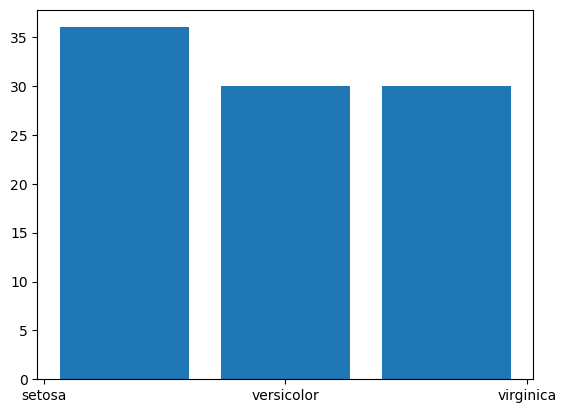

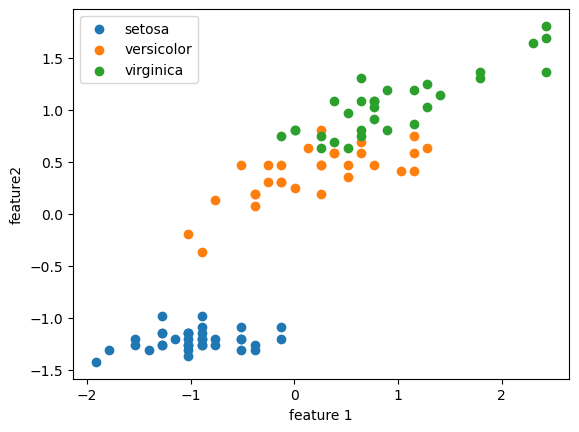

In [419]:
plt.hist(train_outputs, 3, rwidth = 0.8)
plt.xticks(np.arange(len(outputNames)), outputNames)
plt.show()

plot_features(train_inputs, train_outputs)

In [420]:
class Centroid:

    def __init__(self, instance):
        self.__repr = instance
        self.__n = 1
    
    @property
    def repr(self):
        return self.__repr

    def add(self, instance):
        self.__n += 1
        self.__repr = [x - x/(self.__n) + y/(self.__n) for x, y, in zip(self.__repr, instance)]

In [421]:
class Distance:

    def __call__(self, instance1, instance2):
        raise NotImplemented()

class EuclideanDistance(Distance):

    def __call__(self, instance1, instance2):
        return np.sqrt(sum([(x - y) ** 2 for x, y in zip(instance1, instance2)]))

In [422]:
class KMeans:

    def __init__(self, distance):
        self.__distance = distance
        self.__centroids = dict()

    def fit(self, trainSet):
        for instance in trainSet:
            if instance[1] not in self.__centroids:
                self.__centroids[instance[1]] = Centroid(instance[0])
            else:
                self.__centroids[instance[1]].add(instance[0])
    
    def __predictInstance(self, instance):
        minim = float('inf') 
        result = -1

        for cls, centroid in self.__centroids.items():
            dist = self.__distance(instance, centroid.repr)
            if minim > dist:
                minim = dist
                result = cls
        
        return result

    def predict(self, data):
        return [self.__predictInstance(x) for x in data]

In [423]:
params = {'distance': EuclideanDistance()}

In [424]:
kmeans = KMeans(params['distance'])
kmeans.fit(train_set)

In [425]:
predicted = kmeans.predict(test_inputs)
print("acc: ", accuracy_score(predicted, test_outputs))

acc:  0.8
